# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [1]:
# Importando as bibliotecas e carregando os dados
from pandas import read_csv, to_datetime
from seaborn import countplot
import matplotlib.pyplot as plt

pr = read_csv('../previsao_de_renda.csv', index_col=0)

# Removendo colunas desnecessairas
pr.drop(['index', 'mau'], axis=1, inplace=True)

pr

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,1193.29
14996,2016-03-01,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,2519.18
14997,2016-03-01,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,1586.85
14998,2016-03-01,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,6975.39


1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

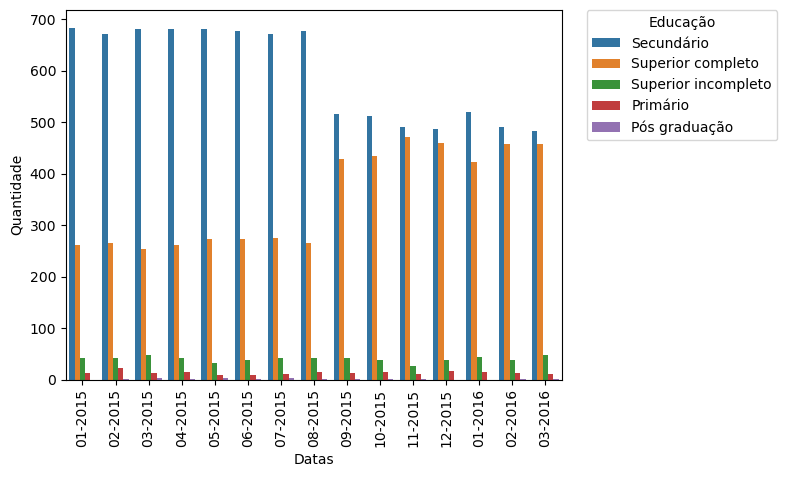

In [38]:
# Convertendo a coluna em datetime
pr['data_ref'] = to_datetime(pr['data_ref'])

# Pegando a lista de datas para o eixo x
dates = pr['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

# Montando grafico
ax_educacao = countplot(
    x='data_ref',
    hue='educacao',
    data=pr,
)

# Estilos do grafico
ax_educacao.set_xticks(list(range(pr['data_ref'].nunique())))
ax_educacao.set_xticklabels(dates, rotation=90)
ax_educacao.set_xlabel('Datas')
ax_educacao.set_ylabel('Quantidade')
plt.legend(title='Educação', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Sim, com o passar do tempo houve uma alteração na quantidade de pessoas no quis respeito a educação. Apartir de 09-2015 houve uma diminuição na quantidade de pessoas formadas no ensino secundário e aumento de pessoas formadas no ensino superior completo. Além disso, a quantidade de pessoas com pós-gradução houve pequenas variações conforme o passar do tempo.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

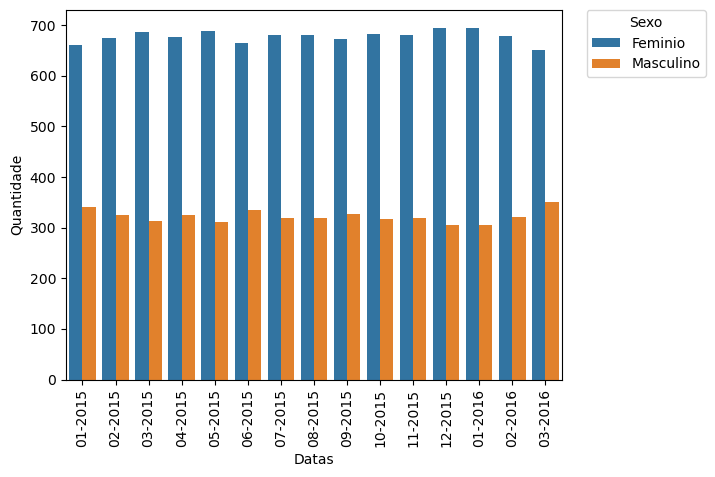

In [54]:
# Montando grafico
ax_sexo = countplot(
    x='data_ref',
    hue='sexo',
    data=pr,
)

# Estilos do grafico
ax_sexo.set_xticks(list(range(pr['data_ref'].nunique())))
ax_sexo.set_xticklabels(dates, rotation=90)
ax_sexo.set_xlabel('Datas')
ax_sexo.set_ylabel('Quantidade')
plt.legend(labels=['Feminio', 'Masculino'], title='Sexo', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

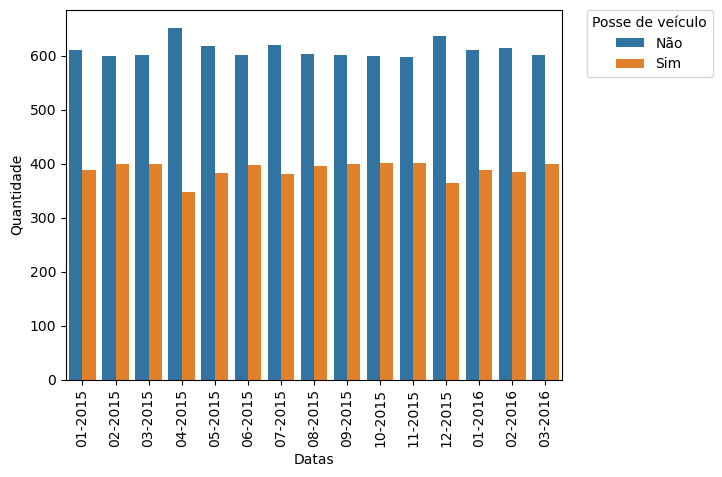

In [56]:
# Montando grafico
ax_veiculo = countplot(
    x='data_ref',
    hue='posse_de_veiculo',
    data=pr,
)

# Estilos do grafico
ax_veiculo.set_xticks(list(range(pr['data_ref'].nunique())))
ax_veiculo.set_xticklabels(dates, rotation=90)
ax_veiculo.set_xlabel('Datas')
ax_veiculo.set_ylabel('Quantidade')
plt.legend(labels=['Não', 'Sim'], title='Posse de veículo', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

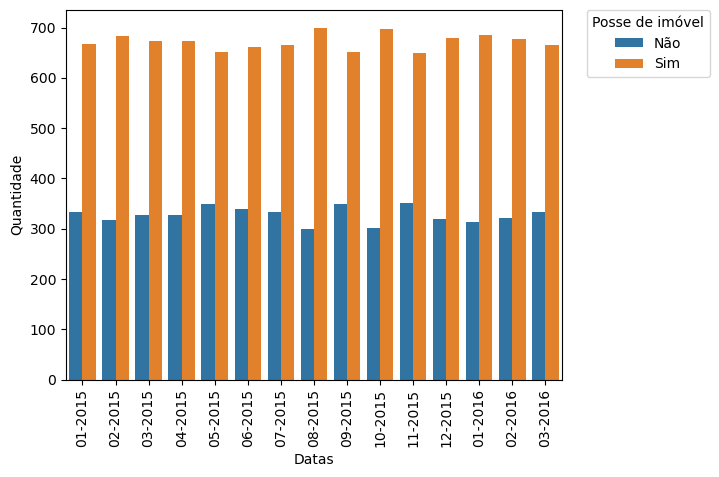

In [57]:
# Montando grafico
ax_imovel = countplot(
    x='data_ref',
    hue='posse_de_imovel',
    data=pr,
)

# Estilos do grafico
ax_imovel.set_xticks(list(range(pr['data_ref'].nunique())))
ax_imovel.set_xticklabels(dates, rotation=90)
ax_imovel.set_xlabel('Datas')
ax_imovel.set_ylabel('Quantidade')
plt.legend(labels=['Não', 'Sim'], title='Posse de imóvel', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

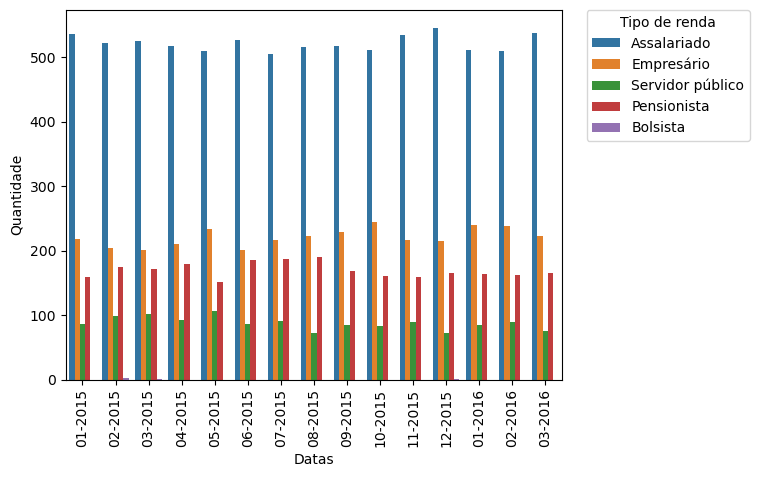

In [58]:
# Montando grafico
ax_tipo_renda = countplot(
    x='data_ref',
    hue='tipo_renda',
    data=pr,
)

# Estilos do grafico
ax_tipo_renda.set_xticks(list(range(pr['data_ref'].nunique())))
ax_tipo_renda.set_xticklabels(dates, rotation=90)
ax_tipo_renda.set_xlabel('Datas')
ax_tipo_renda.set_ylabel('Quantidade')
plt.legend(title='Tipo de renda', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

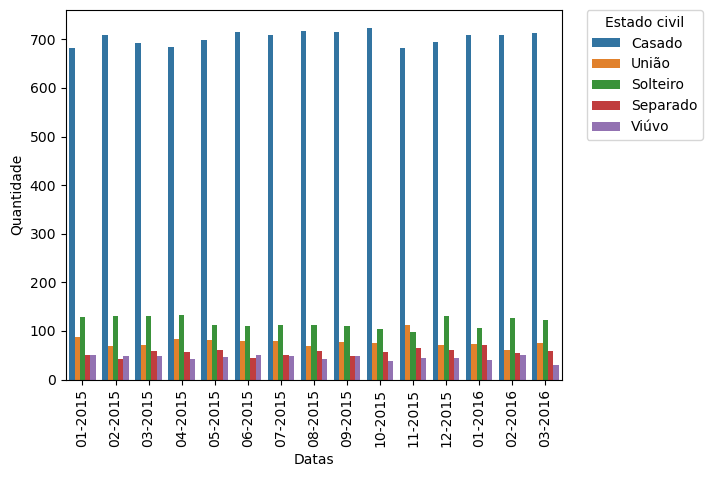

In [59]:
# Montando grafico
ax_estado_civil = countplot(
    x='data_ref',
    hue='estado_civil',
    data=pr,
)

# Estilos do grafico
ax_estado_civil.set_xticks(list(range(pr['data_ref'].nunique())))
ax_estado_civil.set_xticklabels(dates, rotation=90)
ax_estado_civil.set_xlabel('Datas')
ax_estado_civil.set_ylabel('Quantidade')
plt.legend(title='Estado civil', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

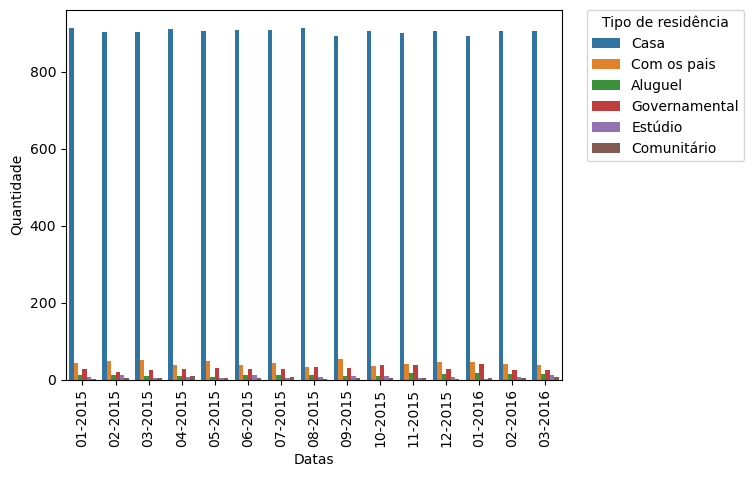

In [60]:
# Montando grafico
ax_tipo_residencia = countplot(
    x='data_ref',
    hue='tipo_residencia',
    data=pr,
)

# Estilos do grafico
ax_tipo_residencia.set_xticks(list(range(pr['data_ref'].nunique())))
ax_tipo_residencia.set_xticklabels(dates, rotation=90)
ax_tipo_residencia.set_xlabel('Datas')
ax_tipo_residencia.set_ylabel('Quantidade')
plt.legend(title='Tipo de residência', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

Acredito quenão houve grandes alterações importantes. Sim, acredito que elas podem ser ultilizadas em uma modelagem, principalmente as variáveis ```posse_de_imovel```, ```posse_de_veiculo``` e ```sexo```.